In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('../assets/train_modified_mg.csv')
test = pd.read_csv('../assets/test_modified_mg.csv')
weather_mod = pd.read_csv('../assets/weather_modified_mg.csv')
spray = pd.read_csv('../assets/spray_modified_mg.csv')

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [4]:
weather_mod.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD
0,1,2007-05-01 00:00:00,83,50,67,14.0,51,56.0,-1.5,-1.5,448,1849,,0,M,0.0,0.0,29.10,29.82,1.7,27,9.2,2007-05-01 04:48:00,2007-05-01 18:49:00,66.5,67,53.0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-01 00:00:00
1,2,2007-05-01 00:00:00,84,52,68,NaN,51,57.0,-3.0,-3.0,448,1849,,M,M,0.0,0.0,29.18,29.82,2.7,25,9.6,2007-05-01 04:48:00,2007-05-01 18:49:00,68.0,68,53.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-01 00:00:00
2,1,2007-05-02 00:00:00,59,42,51,-3.0,42,47.0,0.0,0.0,447,1850,BR,0,M,0.0,0.0,29.38,30.09,13.0,4,13.4,2007-05-02 04:47:00,2007-05-02 18:50:00,50.5,51,54.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,2007-05-02 00:00:00
3,2,2007-05-02 00:00:00,60,43,52,NaN,42,47.0,0.0,0.0,447,1850,BR HZ,M,M,0.0,0.0,29.44,30.08,13.3,2,13.4,2007-05-02 04:47:00,2007-05-02 18:50:00,51.5,52,54.0,-2.0,0,1,0,1,0,0,0,0,0,0,0,0,2007-05-02 00:00:00
4,1,2007-05-03 00:00:00,66,46,56,2.0,40,48.0,0.0,0.0,446,1851,,0,M,0.0,0.0,29.39,30.12,11.7,7,11.9,2007-05-03 04:46:00,2007-05-03 18:51:00,56.0,56,54.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-03 00:00:00


In [5]:
train

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,YMD
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007-05-29
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007-05-29
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007-05-29
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0,2007-05-29
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0,2007-05-29
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0,2007-05-29
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0,2007-05-29
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0,2007-05-29


In [6]:
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
YMD                       0
dtype: int64

In [7]:
train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [8]:
train.duplicated().sum()

813

In [9]:
train[train.duplicated()]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,YMD
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0,2007-06-26
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0,2007-07-11
351,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0,2007-07-11
353,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0,2007-07-11
512,2007-07-18,"3300 West Randolph Street, Chicago, IL 60612, USA",CULEX RESTUANS,33,E RANDOLPH ST,T044,"3300 E RANDOLPH ST, Chicago, IL",41.883284,-87.705085,8,1,0,2007-07-18
531,2007-07-18,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,50,0,2007-07-18
548,2007-07-18,"3700 118th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,37,E 118TH ST,T212,"3700 E 118TH ST, Chicago, IL",41.680946,-87.535198,8,50,0,2007-07-18
587,2007-07-19,"3700 118th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,37,E 118TH ST,T212,"3700 E 118TH ST, Chicago, IL",41.680946,-87.535198,8,50,0,2007-07-19
588,2007-07-19,"3700 118th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,37,E 118TH ST,T212,"3700 E 118TH ST, Chicago, IL",41.680946,-87.535198,8,50,0,2007-07-19
589,2007-07-19,"3700 118th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,37,E 118TH ST,T212,"3700 E 118TH ST, Chicago, IL",41.680946,-87.535198,8,50,0,2007-07-19


In [10]:
train.drop_duplicates(inplace = True)

In [11]:
train.duplicated().sum()

0

In [12]:
train.Address.unique()

array(['4100 North Oak Park Avenue, Chicago, IL 60634, USA',
       '6200 North Mandell Avenue, Chicago, IL 60646, USA',
       '7900 West Foster Avenue, Chicago, IL 60656, USA',
       '1500 West Webster Avenue, Chicago, IL 60614, USA',
       '2500 West Grand Avenue, Chicago, IL 60654, USA',
       '1100 Roosevelt Road, Chicago, IL 60608, USA',
       '1100 West Chicago Avenue, Chicago, IL 60642, USA',
       '2100 North Stave Street, Chicago, IL 60647, USA',
       '2200 North Cannon Drive, Chicago, IL 60614, USA',
       '2200 West 113th Street, Chicago, IL 60643, USA',
       '1100 South Peoria Street, Chicago, IL 60608, USA',
       '1700 West 95th Street, Chicago, IL 60643, USA',
       '2200 West 89th Street, Chicago, IL 60643, USA',
       'North Streeter Drive, Chicago, IL 60611, USA',
       '6500 North Oak Park Avenue, Chicago, IL 60631, USA',
       '7500 North Oakley Avenue, Chicago, IL 60645, USA',
       '1500 North Long Avenue, Chicago, IL 60651, USA',
       '8900 Sou

In [13]:
train.Address.nunique()

138

In [14]:
train.Trap.nunique()

136

In [15]:
train.Latitude.nunique()

138

In [16]:
train.Longitude.nunique()

138

In [17]:
train.Block.nunique()

64

In [18]:
train.Trap.unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

In [19]:
train[train.Trap == "T002"]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,YMD
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007-05-29
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007-05-29
25,2007-06-05,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,3,0,2007-06-05
26,2007-06-05,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,5,0,2007-06-05
27,2007-06-05,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007-06-05
85,2007-06-26,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007-06-26
86,2007-06-26,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,4,0,2007-06-26
87,2007-06-26,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007-06-26
155,2007-06-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2,0,2007-06-29
201,2007-07-02,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,3,0,2007-07-02


In [20]:
train[train.Address == "Chicago, IL, USA"]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,YMD
69,2007-06-05,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,3,0,2007-06-05
127,2007-06-26,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,2007-06-26
179,2007-06-29,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,2007-06-29
237,2007-07-02,"Chicago, IL, USA",CULEX SALINARIUS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,2007-07-02
342,2007-07-11,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,3,0,2007-07-11
343,2007-07-11,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,2007-07-11
557,2007-07-19,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,2007-07-19
728,2007-07-27,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,4,0,2007-07-27
729,2007-07-27,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,2,0,2007-07-27
929,2007-08-01,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,6,0,2007-08-01


In [21]:
train[train.Address == ""]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,YMD


In [22]:
trainc = pd.read_csv("../assets/train_complete.csv")

In [23]:
trainc

,Species,Block,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,YMD,PIPIENS,RESTUANS,SALINARIUS,TERRITANS,Station,Tmax,Tmin,DewPoint,WetBulb,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,Days_Since_Spray,Dist_to_Closest_Spray
0,CULEX PIPIENS/RESTUANS,41,T002,41.954690,-87.800991,9,1,0,2007-05-29,1,1,0,0,2,88,65,59,66.0,421,1917,0.00,29.44,30.09,5.8,16,7.4,77,64.0,13.0,0,1,0,1,0,0,0,0,0,0,0,0,720,1.500000
1,CULEX RESTUANS,41,T002,41.954690,-87.800991,9,1,0,2007-05-29,0,1,0,0,2,88,65,59,66.0,421,1917,0.00,29.44,30.09,5.8,16,7.4,77,64.0,13.0,0,1,0,1,0,0,0,0,0,0,0,0,720,1.500000
2,CULEX RESTUANS,62,T007,41.994991,-87.769279,9,1,0,2007-05-29,0,1,0,0,1,88,60,58,65.0,421,1917,0.00,29.39,30.11,5.8,18,6.5,74,64.0,10.0,0,1,0,1,0,0,0,0,0,0,0,0,720,1.500000
3,CULEX PIPIENS/RESTUANS,79,T015,41.974089,-87.824812,8,1,0,2007-05-29,1,1,0,0,1,88,60,58,65.0,421,1917,0.00,29.39,30.11,5.8,18,6.5,74,64.0,10.0,0,1,0,1,0,0,0,0,0,0,0,0,720,1.500000
4,CULEX RESTUANS,79,T015,41.974089,-87.824812,8,4,0,2007-05-29,0,1,0,0,1,88,60,58,65.0,421,1917,0.00,29.39,30.11,5.8,18,6.5,74,64.0,10.0,0,1,0,1,0,0,0,0,0,0,0,0,720,1.500000
5,CULEX RESTUANS,15,T045,41.921600,-87.666455,8,2,0,2007-05-29,0,1,0,0,2,88,65,59,66.0,421,1917,0.00,29.44,30.09,5.8,16,7.4,77,64.0,13.0,0,1,0,1,0,0,0,0,0,0,0,0,720,1.500000
6,CULEX RESTUANS,25,T046,41.891118,-87.654491,8,1,0,2007-05-29,0,1,0,0,2,88,65,59,66.0,421,1917,0.00,29.44,30.09,5.8,16,7.4,77,64.0,13.0,0,1,0,1,0,0,0,0,0,0,0,0,720,1.500000
7,CULEX PIPIENS/RESTUANS,11,T048,41.867108,-87.654224,8,1,0,2007-05-29,1,1,0,0,2,88,65,59,66.0,421,1917,0.00,29.44,30.09,5.8,16,7.4,77,64.0,13.0,0,1,0,1,0,0,0,0,0,0,0,0,720,1.500000
8,CULEX RESTUANS,11,T048,41.867108,-87.654224,8,2,0,2007-05-29,0,1,0,0,2,88,65,59,66.0,421,1917,0.00,29.44,30.09,5.8,16,7.4,77,64.0,13.0,0,1,0,1,0,0,0,0,0,0,0,0,720,1.500000
9,CULEX RESTUANS,11,T049,41.896282,-87.655232,8,1,0,2007-05-29,0,1,0,0,2,88,65,59,66.0,421,1917,0.00,29.44,30.09,5.8,16,7.4,77,64.0,13.0,0,1,0,1,0,0,0,0,0,0,0,0,720,1.500000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
sns.set(style = "whitegrid", color_codes = True)


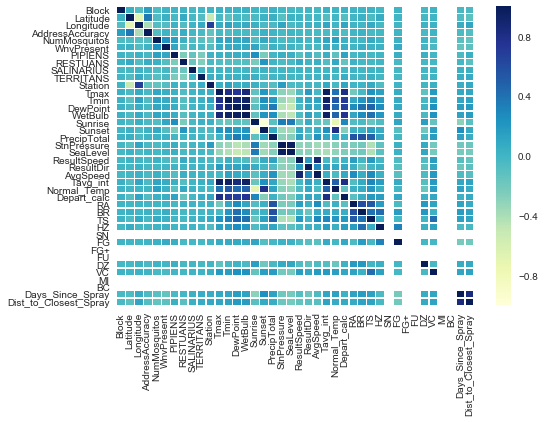

In [36]:
sns.heatmap(trainc.corr(), linewidths = 0.4, cmap = "YlGnBu")

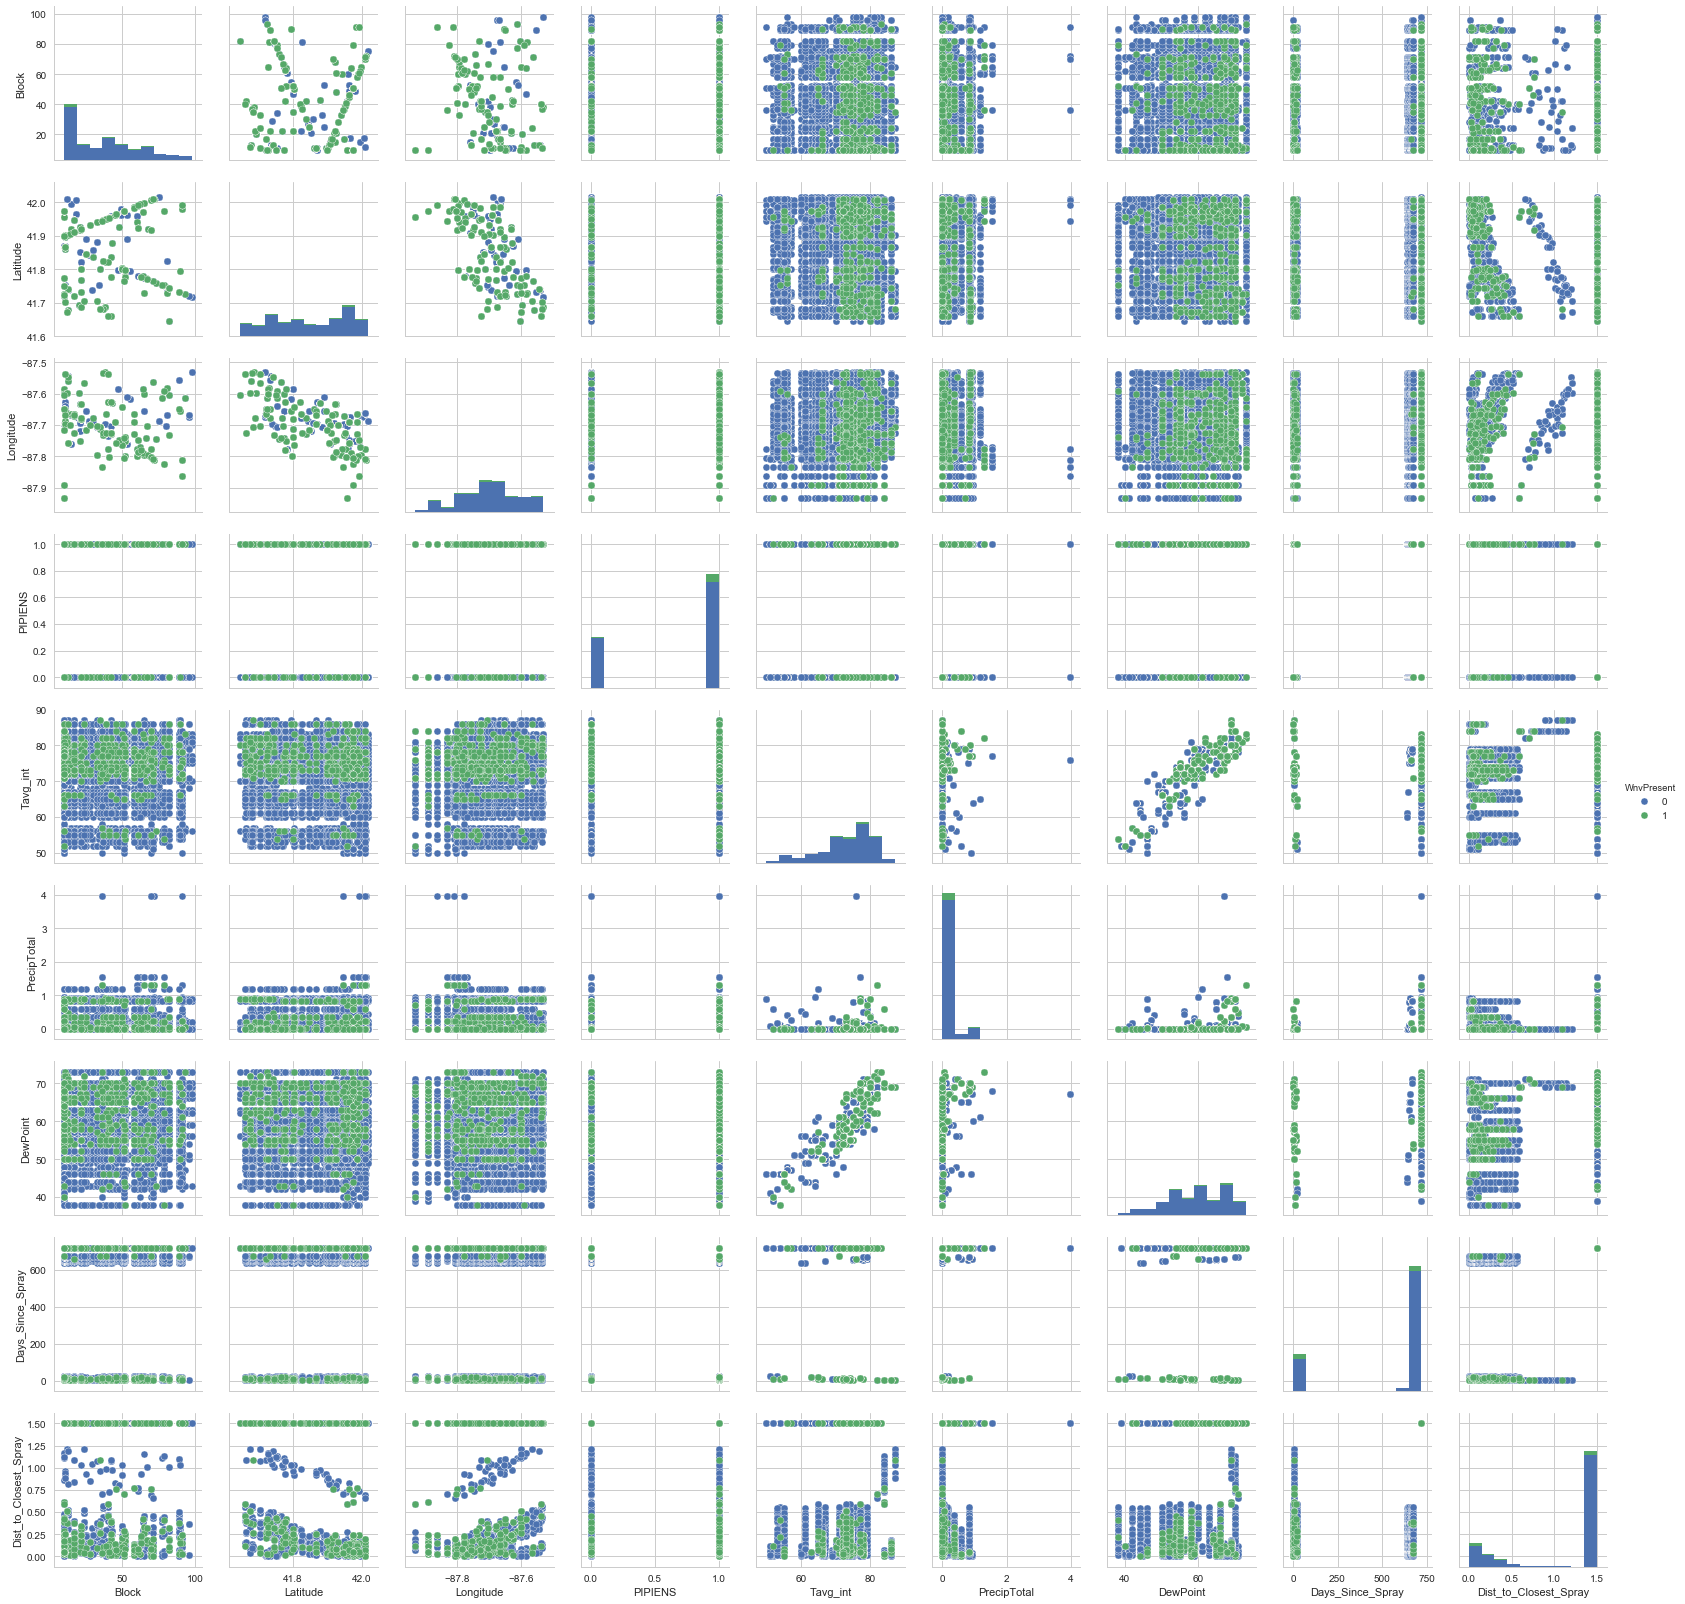

In [27]:
sns.pairplot(trainc, vars = ["Block", "Latitude", "Longitude", "PIPIENS", "Tavg_int", "PrecipTotal", "DewPoint", "Days_Since_Spray", "Dist_to_Closest_Spray"], hue = "WnvPresent")

In [28]:
trainc.columns

Index([u'Species', u'Block', u'Trap', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent', u'YMD', u'PIPIENS',
       u'RESTUANS', u'SALINARIUS', u'TERRITANS', u'Station', u'Tmax', u'Tmin',
       u'DewPoint', u'WetBulb', u'Sunrise', u'Sunset', u'PrecipTotal',
       u'StnPressure', u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed',
       u'Tavg_int', u'Normal_Temp', u'Depart_calc', u'RA', u'BR', u'TS', u'HZ',
       u'SN', u'FG', u'FG+', u'FU', u'DZ', u'VC', u'MI', u'BC',
       u'Days_Since_Spray', u'Dist_to_Closest_Spray'],
      dtype='object')

### Investigating distributions of possible explanatory variables, and how they differ according to 
### whether or not the virus was present

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text xticklabel objects>)

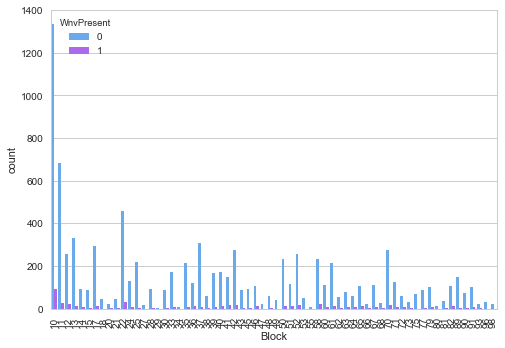

In [29]:
sns.countplot(x = "Block", hue = "WnvPresent", data = trainc, palette = "cool")
#plt.xlabel("Relationship to Descriptor", fontsize = 24)
#plt.title("Wage Disparity within Households", fontsize = 32)
plt.xticks(rotation = 90)

In [30]:
trainc.groupby("WnvPresent").Block.agg(["median", "mean", "std"]).sort_values("mean")

,median,mean,std
WnvPresent,,,
0,36,37.179325,24.320923
1,39,38.188867,24.508193


In [ ]:
##the distribution of traps with west nile virus present by block is slightly shifted to the right, as compared to
##traps without the virus present

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137]),
 <a list of 138 Text xticklabel objects>)

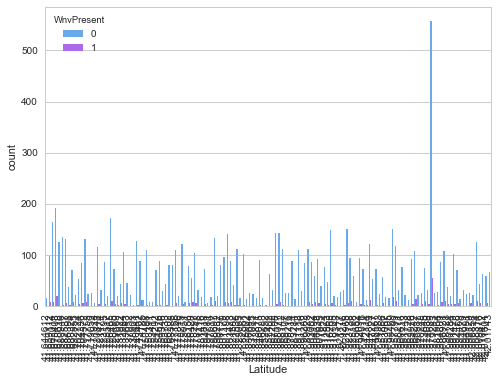

In [31]:
sns.countplot(x = "Latitude", hue = "WnvPresent", data = trainc, palette = "cool")
#plt.xlabel("Relationship to Descriptor", fontsize = 24)
#plt.title("Wage Disparity within Households", fontsize = 32)
plt.xticks(rotation = 90)

In [32]:
trainc.groupby("WnvPresent").Latitude.agg(["median" ,"mean", "std"]).sort_values("mean")

,median,mean,std
WnvPresent,,,
0,41.867108,41.846765,0.109000
1,41.906638,41.863205,0.115776


In [ ]:
##the distribution of traps with west nile virus present by latitude is slightly shifted to the right, as compared to
##traps without the virus present (WNV more common at higher latitudes)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137]),
 <a list of 138 Text xticklabel objects>)

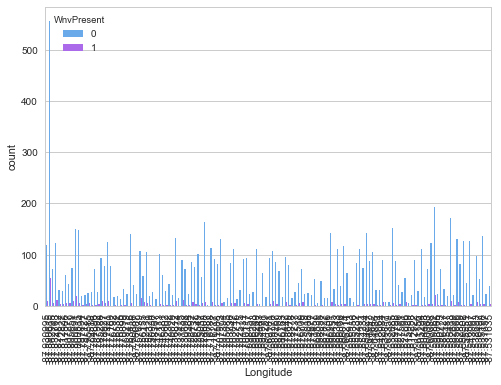

In [33]:
sns.countplot(x = "Longitude", hue = "WnvPresent", data = trainc, palette = "cool")
#plt.xlabel("Relationship to Descriptor", fontsize = 24)
#plt.title("Wage Disparity within Households", fontsize = 32)
plt.xticks(rotation = 90)

In [34]:
trainc.groupby("WnvPresent").Longitude.agg(["median", "mean", "std"]).sort_values("mean")

,median,mean,std
WnvPresent,,,
1,-87.728492,-87.730227,0.099681
0,-87.696269,-87.701323,0.092885


In [ ]:
##the distribution of traps with west nile virus present by longitude is slightly shifted to the right, as compared to
##traps without the virus present (WNV more common at more easterly latitudes)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

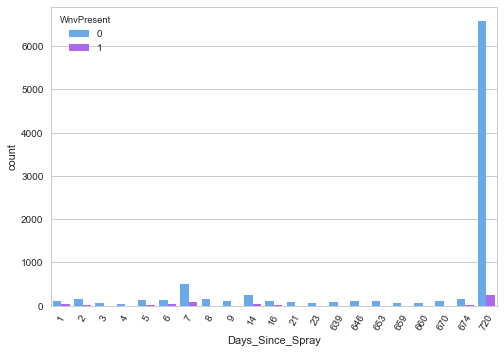

In [37]:
sns.countplot(x = "Days_Since_Spray", hue = "WnvPresent", data = trainc, palette = "cool")
# plt.xlabel("Relationship to Descriptor", fontsize = 24)
# plt.title("Wage Disparity within Households", fontsize = 32)
plt.xticks(rotation = 60)

In [38]:
trainc.groupby("WnvPresent").Days_Since_Spray.agg(["median", "mean", "std"]).sort_values("mean")

,median,mean,std
WnvPresent,,,
1,720,374.998012,355.763967
0,720,567.658433,286.661822


In [ ]:
##Hard to interpret this information
##maybe a good predictor?

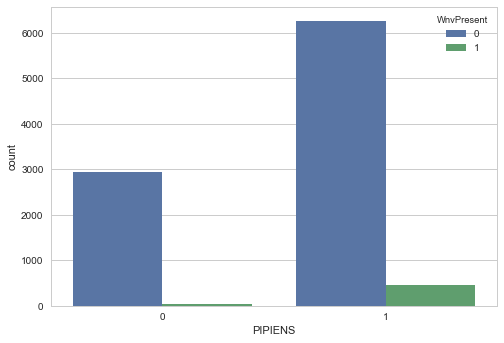

In [43]:
sns.countplot(x="PIPIENS", hue = "WnvPresent", data = trainc)

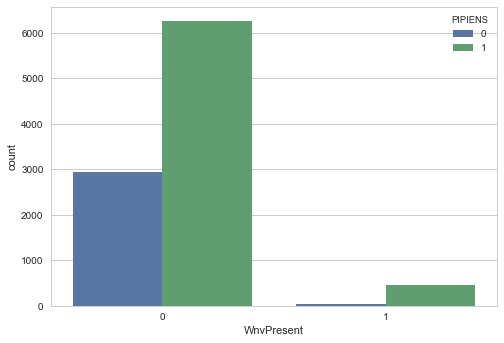

In [44]:
sns.countplot(x="WnvPresent", hue="PIPIENS", data=trainc)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

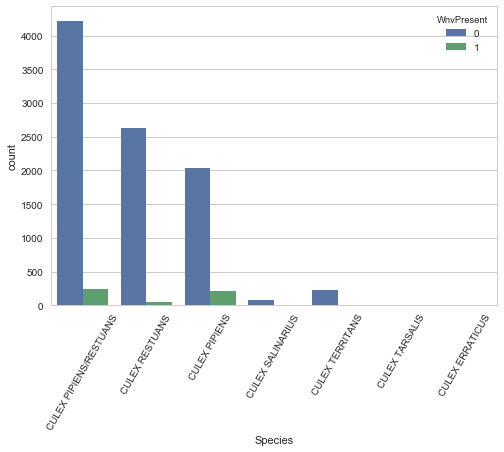

In [46]:
sns.countplot(x = "Species", hue = "WnvPresent", data = trainc)
plt.xticks(rotation = 60)

In [51]:
trainc.groupby("WnvPresent").PIPIENS.agg(["median", "mean", "std"]).sort_values("mean")

,median,mean,std
WnvPresent,,,
0,1,0.680522,0.466300
1,1,0.902584,0.296818


In [ ]:
##whether or not Culex pipiens is found in a trap may be a good predictor of whether or not WNV is present

In [52]:
trainc.groupby("PIPIENS").WnvPresent.agg(["median", "mean", "std"]).sort_values("mean")

,median,mean,std
PIPIENS,,,
0,0,0.016415,0.127088
1,0,0.067680,0.251215


In [56]:
trainc.groupby("WnvPresent").RESTUANS.agg(["median", "mean", "std"]).sort_values("mean")

,median,mean,std
WnvPresent,,,
1,1,0.586481,0.492954
0,1,0.744940,0.435919


In [57]:
trainc.groupby("RESTUANS").WnvPresent.agg(["median", "mean", "std"]).sort_values("mean")

,median,mean,std
RESTUANS,,,
1,0,0.041311,0.199022
0,0,0.081505,0.273662


In [ ]:
##So restuans NOT a good predictor of WNV Present

In [53]:
trainc.groupby("Species").WnvPresent.agg(["median", "mean", "std"]).sort_values("mean")

,median,mean,std
Species,,,
CULEX ERRATICUS,0,0.000000,NaN
CULEX SALINARIUS,0,0.000000,0.000000
CULEX TARSALIS,0,0.000000,0.000000
CULEX TERRITANS,0,0.000000,0.000000
CULEX RESTUANS,0,0.018338,0.134197
CULEX PIPIENS/RESTUANS,0,0.055046,0.228095
CULEX PIPIENS,0,0.092899,0.290355


In [ ]:
#Do we maybe want a variable for C. pipiens, C. restuans, and C. pipiens / C. restuans ??

##NVM

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

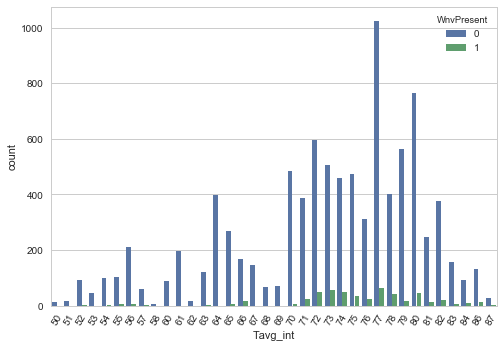

In [47]:
sns.countplot(x = "Tavg_int", hue = "WnvPresent", data = trainc)
plt.xticks(rotation = 60)

In [48]:
trainc.groupby("WnvPresent").Tavg_int.agg(["median", "mean", "std"]).sort_values("mean")

,median,mean,std
WnvPresent,,,
0,74,72.919913,7.656881
1,75,75.137177,5.460385


In [ ]:
##looks like average temp on a given day will be a good predictor of whether or not west nile is present in a trap

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

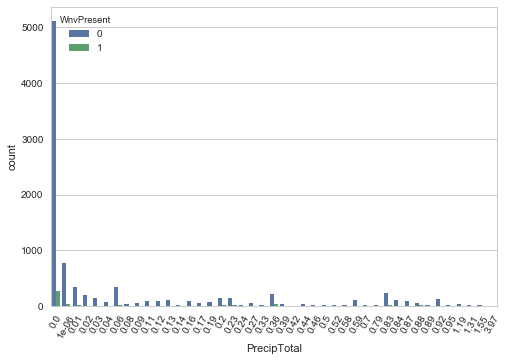

In [54]:
sns.countplot(x = "PrecipTotal", hue = "WnvPresent", data = trainc)
plt.xticks(rotation = 60)

In [55]:
trainc.groupby("WnvPresent").PrecipTotal.agg(["median", "mean", "std"]).sort_values("mean")

,median,mean,std
WnvPresent,,,
0,0.0,0.120670,0.282091
1,0.0,0.159404,0.302462


In [ ]:
##PrecipTotal should be included, too

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

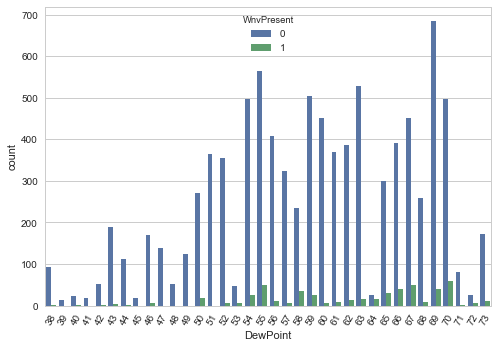

In [58]:
sns.countplot(x = "DewPoint", hue = "WnvPresent", data = trainc)
plt.xticks(rotation = 60)

In [59]:
trainc.groupby("WnvPresent").DewPoint.agg(["median", "mean", "std"]).sort_values("mean")

,median,mean,std
WnvPresent,,,
0,60,59.175517,7.963650
1,64,62.208748,6.977351


In [ ]:
##Dew Point looks like a good predictor as well!

In [62]:
# sns.countplot(x = "Dist_to_Closest_Spray", hue = "WnvPresent", data = trainc)
# plt.xticks(rotation = 60)

In [61]:
trainc.groupby("WnvPresent").Dist_to_Closest_Spray.agg(["median", "mean", "std"]).sort_values("mean")

,median,mean,std
WnvPresent,,,
1,1.5,0.831521,0.679310
0,1.5,1.135759,0.588581


In [ ]:
#probably a good predictor, graph is not fun to look at

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

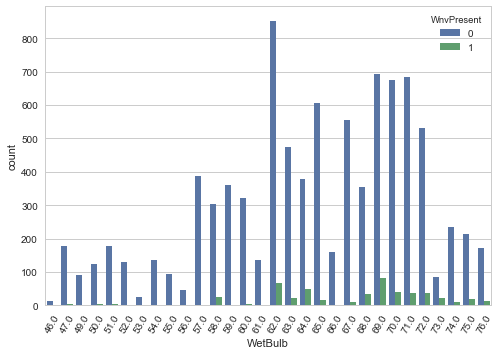

In [63]:
sns.countplot(x = "WetBulb", hue = "WnvPresent", data = trainc)
plt.xticks(rotation = 60)

In [64]:
trainc.groupby("WnvPresent").WetBulb.agg(["median", "mean", "std"]).sort_values("mean")

,median,mean,std
WnvPresent,,,
0,65.0,64.521001,6.800705
1,69.0,67.003976,5.410259


In [ ]:
##decent predictor

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text xticklabel objects>)

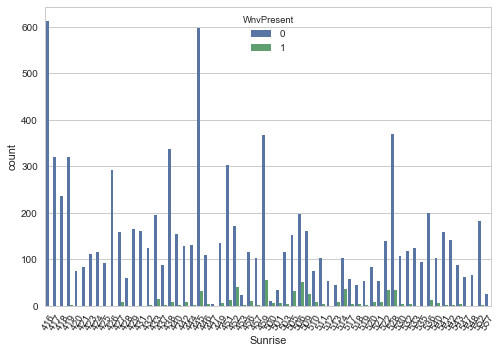

In [71]:
sns.countplot(x = "Sunrise", hue = "WnvPresent", data = trainc)
plt.xticks(rotation = 60)

In [65]:
trainc.groupby("WnvPresent").Sunrise.agg(["median", "mean", "std"]).sort_values("mean")

,median,mean,std
WnvPresent,,,
0,446,467.319042,46.308657
1,506,488.880716,34.405562


In [ ]:
##earlier Sunrise ~ increased likelihood of WnvPresent

In [77]:
trainc.groupby("WnvPresent").DZ.agg(["median", "mean", "std"]).sort_values("mean") #nope (Drizzle)

,median,mean,std
WnvPresent,,,
1,0,0.013917,0.117261
0,0,0.015560,0.123774


In [78]:
trainc.groupby("WnvPresent").FG.agg(["median", "mean", "std"]).sort_values("mean") #yep (Fog)

,median,mean,std
WnvPresent,,,
0,0,0.010120,0.100092
1,0,0.045726,0.209097


In [79]:
trainc.groupby("WnvPresent").BR.agg(["median", "mean", "std"]).sort_values("mean") #yep (Mist)

,median,mean,std
WnvPresent,,,
0,0,0.271491,0.444753
1,0,0.379722,0.485801


In [82]:
trainc.groupby("WnvPresent").RA.agg(["median", "mean", "std"]).sort_values("mean") #ehhhhhhhhh (Rain)

,median,mean,std
WnvPresent,,,
0,0,0.313819,0.464069
1,0,0.324056,0.468487


In [83]:
trainc.groupby("WnvPresent").TS.agg(["median", "mean", "std"]).sort_values("mean") #eh? (Thunderstorm)

,median,mean,std
WnvPresent,,,
0,0,0.187486,0.390323
1,0,0.236581,0.425406


In [84]:
trainc.groupby("WnvPresent").HZ.agg(["median", "mean", "std"]).sort_values("mean") #yeah .... (Haze)

,median,mean,std
WnvPresent,,,
0,0,0.099891,0.299871
1,0,0.133201,0.340130


In [96]:
trainc.groupby("WnvPresent").VC.agg(["median", "mean", "std"]).sort_values("mean") #good predictor of not WNV ... (vicinity)

,median,mean,std
WnvPresent,,,
1,0,0.009940,0.099303
0,0,0.041893,0.200356


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

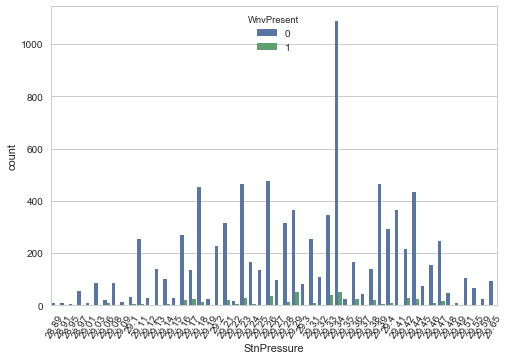

In [100]:
sns.countplot(x = "StnPressure", hue = "WnvPresent", data = trainc)
plt.xticks(rotation = 60)

In [99]:
trainc.groupby("WnvPresent").StnPressure.agg(["median", "mean", "std"]).sort_values("mean") #maybe

,median,mean,std
WnvPresent,,,
1,29.29,29.299901,0.101232
0,29.31,29.301891,0.118004


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

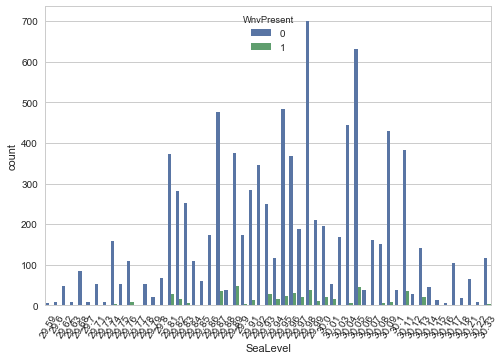

In [101]:
sns.countplot(x = "SeaLevel", hue = "WnvPresent", data = trainc)
plt.xticks(rotation = 60)

In [102]:
trainc.groupby("WnvPresent").SeaLevel.agg(["median", "mean", "std"]).sort_values("mean") #no

,median,mean,std
WnvPresent,,,
0,29.96,29.957355,0.120035
1,29.96,29.961630,0.099353


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]),
 <a list of 85 Text xticklabel objects>)

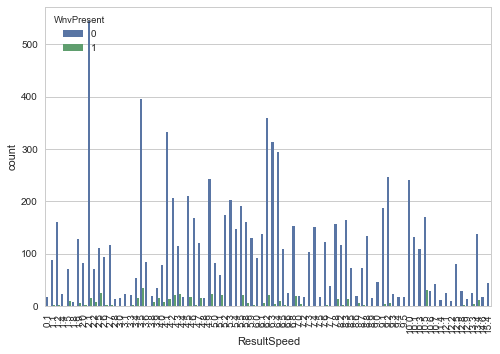

In [105]:
sns.countplot(x = "ResultSpeed", hue = "WnvPresent", data = trainc)
plt.xticks(rotation = 90)

In [103]:
trainc.groupby("WnvPresent").ResultSpeed.agg(["median", "mean", "std"]).sort_values("mean") #maybe

,median,mean,std
WnvPresent,,,
1,4.7,5.409940,2.715534
0,5.8,5.974625,2.921527


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

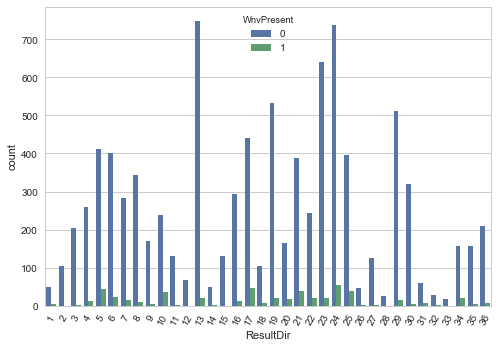

In [106]:
sns.countplot(x = "ResultDir", hue = "WnvPresent", data = trainc)
plt.xticks(rotation = 60)

In [107]:
trainc.groupby("WnvPresent").ResultDir.agg(["median", "mean", "std"]).sort_values("mean") #maybe

,median,mean,std
WnvPresent,,,
1,19,17.773360,8.683703
0,19,17.891621,9.098941


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]),
 <a list of 84 Text xticklabel objects>)

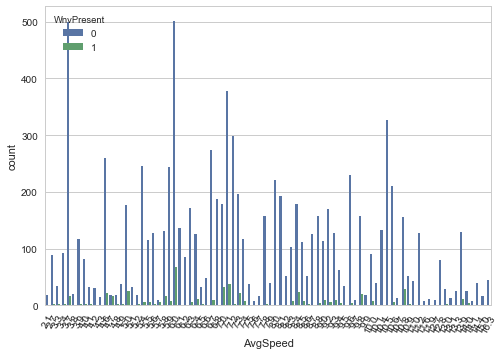

In [108]:
sns.countplot(x = "AvgSpeed", hue = "WnvPresent", data = trainc)
plt.xticks(rotation = 60)

In [109]:
trainc.groupby("WnvPresent").AvgSpeed.agg(["median", "mean", "std"]).sort_values("mean") #maybe

,median,mean,std
WnvPresent,,,
1,7.0,7.168588,2.283530
0,7.2,7.501382,2.536618


In [80]:
trainc.columns

Index([u'Species', u'Block', u'Trap', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent', u'YMD', u'PIPIENS',
       u'RESTUANS', u'SALINARIUS', u'TERRITANS', u'Station', u'Tmax', u'Tmin',
       u'DewPoint', u'WetBulb', u'Sunrise', u'Sunset', u'PrecipTotal',
       u'StnPressure', u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed',
       u'Tavg_int', u'Normal_Temp', u'Depart_calc', u'RA', u'BR', u'TS', u'HZ',
       u'SN', u'FG', u'FG+', u'FU', u'DZ', u'VC', u'MI', u'BC',
       u'Days_Since_Spray', u'Dist_to_Closest_Spray'],
      dtype='object')

In [ ]:
## look at DZ, FG, BR